In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("cardio_train.csv", sep = ";")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


(70000, 13)

In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


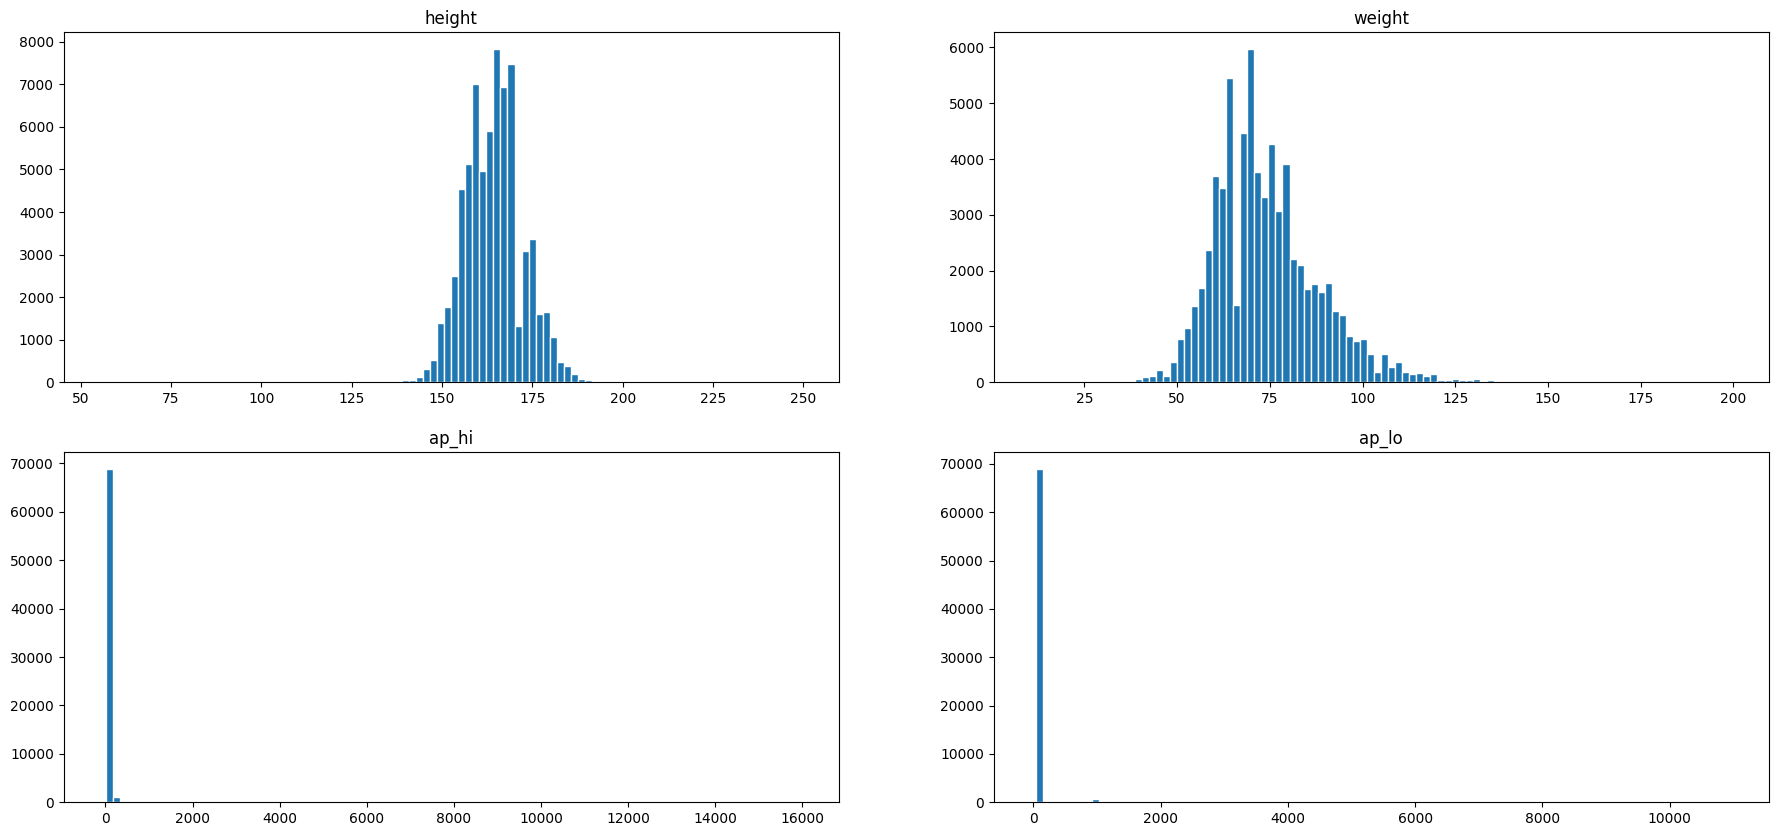

In [4]:
plt.figure(figsize=(22, 10))

cols = ['height', 'weight', 'ap_hi', 'ap_lo']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)  
    plt.hist(df[col], bins=100, edgecolor='white')
    plt.title(col)

plt.show()

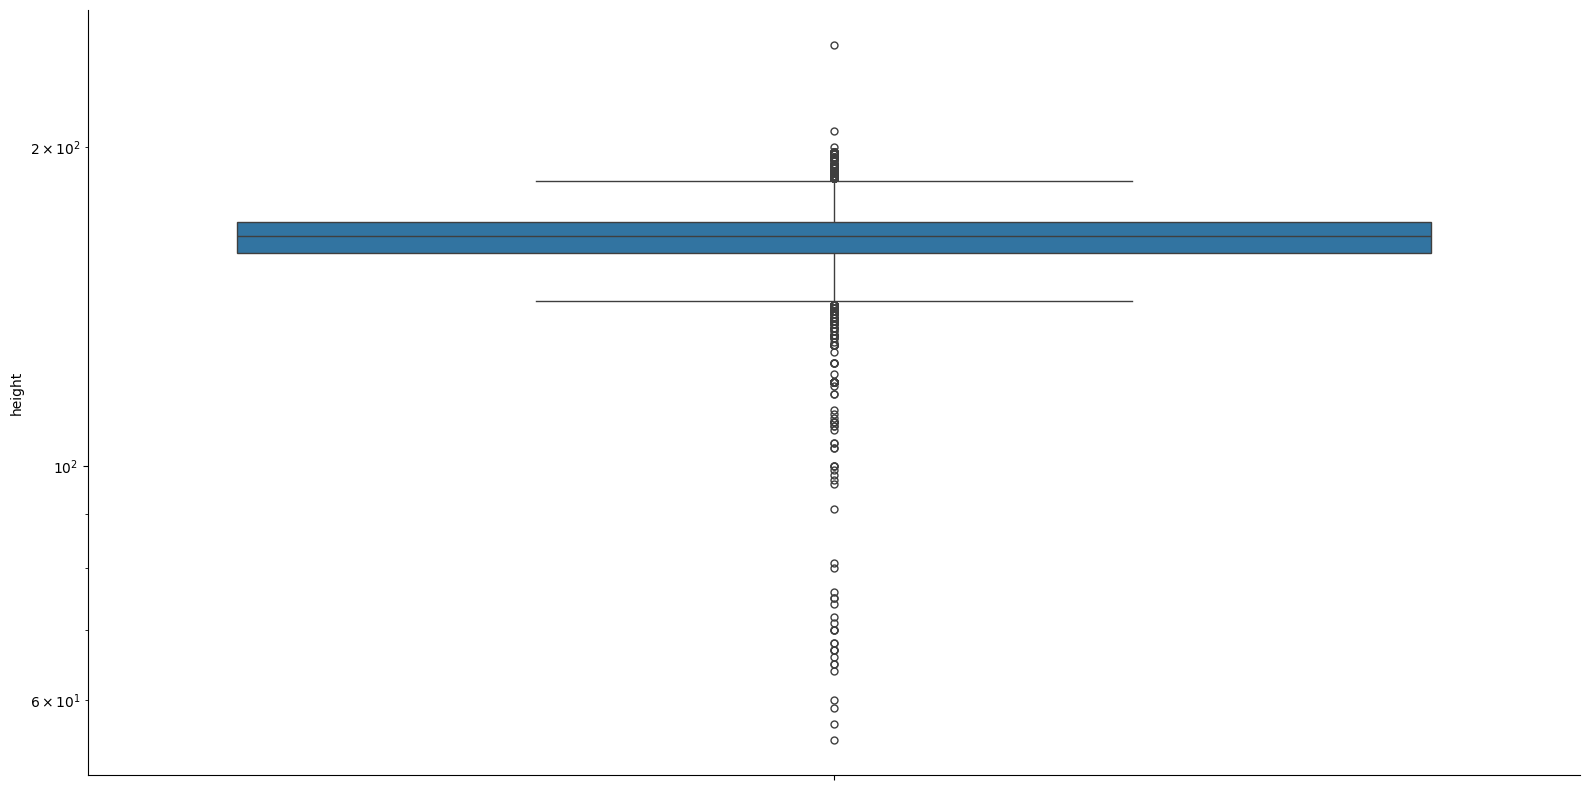

In [5]:
sns.catplot(data=df['height'], kind="box", height=8, aspect=2)  # plus large et plus haut
plt.yscale('log')
plt.xticks(rotation=45)  # rotation des noms de colonnes

plt.tight_layout()
plt.show()


En observant le catplot ainsi que la distributivité des données, nous pouvons conclure que nous sommes en présence d'outliers. Nous allons donc effectuer une démarche scientifique pour les éliminers et travailler sur des données "réalisables".

## Détection des valeurs abérentes

In [6]:
print("Age Maximum : ",df['age'].max() / 365)
print("Age Minimum : ",df['age'].min() / 365)

Age Maximum :  64.96712328767123
Age Minimum :  29.583561643835615


Nous pouvons voir que les ages sont compris entre 29 et 64 ans. Cela ne constitue pas d'outliers notables mais nous pouvons affirmer que ce sont des adultes. Cela nous sera utile pour comparer l'age avec les autres variables continues pour éliminer les valeurs abérentes.

Maintenant, nous pouvons comparer ces valeurs avec celles acceptables selont les mesures obtenues. Les valeurs supérieures ou inférieures sont du à une erreure de saisie

## Valeurs cohérentes : 

- 🔹 AP_HIGH : Systolic Blood Pressure (mmHg)

| État                         | Pression systolique |
|------------------------------|----------------------|
| Tension basse (hypotension) | < 90                 |
| Normale                     | 90 – 120             |
| Pré-hypertension / normale haute | 120 – 139       |
| Hypertension (stade 1)      | 140 – 159            |
| Hypertension (stade 2)      | ≥ 160                |
| Urgence hypertensive (extrême) | ≥ 180            |
| Limite extrême tolérable    | Jusqu’à 250          |

---

- 🔹 AP_LOW : Diastolic Blood Pressure (mmHg)

| État                         | Pression diastolique |
|------------------------------|-----------------------|
| Tension basse (hypotension) | < 60                  |
| Normale                     | 60 – 80               |
| Pré-hypertension            | 80 – 89               |
| Hypertension (stade 1)      | 90 – 99               |
| Hypertension (stade 2)      | ≥ 100                 |
| Urgence hypertensive (critique) | ≥ 120            |
| Limite maximale tolérable   | Jusqu’à 150           |

---

- 🔹 HEIGHT (Taille en cm)

| Seuil     | Explication                          |
|-----------|--------------------------------------|
| < 100 cm  | Trop petit (erreur ou enfant < 5 ans)|
| > 250 cm  | Extrêmement rare, probablement une erreur |

---

- 🔹 WEIGHT (Poids en kg)

| Seuil     | Explication                             |
|-----------|-----------------------------------------|
| < 30 kg   | Très maigre (enfant ou erreur)          |
| > 250 kg  | Extrêmement obèse ou mal enregistré     |


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
print("----------AP_HI----------------------------------")
print("Valeurs < 70 :", (df['ap_hi'] < 70).sum())
print("Valeurs > 250 :", (df['ap_hi'] > 250).sum())
print("-------------------------------------------------")
print("----------AP_LO----------------------------------")
print("Valeurs < 40 :", (df['ap_lo'] < 40).sum())
print("Valeurs > 150 :", (df['ap_lo'] > 150).sum())
print("-------------------------------------------------")
print("----------HEIGHT---------------------------------")
print("Valeurs < 140 cm :", (df['height'] < 140).sum())
print("Valeurs > 220 cm :", (df['height'] > 220).sum())
print("-------------------------------------------------")
print("----------WEIGHT---------------------------------")
print("Valeurs < 40 kg :", (df['weight'] < 40).sum())
print("Valeurs > 250 kg :", (df['weight'] > 250).sum())
print("-------------------------------------------------")

----------AP_HI----------------------------------
Valeurs < 70 : 189
Valeurs > 250 : 40
-------------------------------------------------
----------AP_LO----------------------------------
Valeurs < 40 : 59
Valeurs > 150 : 975
-------------------------------------------------
----------HEIGHT---------------------------------
Valeurs < 140 cm : 152
Valeurs > 220 cm : 1
-------------------------------------------------
----------WEIGHT---------------------------------
Valeurs < 40 kg : 52
Valeurs > 250 kg : 0
-------------------------------------------------


Ce sont les valeurs "impossibles", nous avons pris la décision de les enlevers du dataset pour travailler avec des valeurs réelles. 

In [13]:
df_clean = df[
    (df['ap_hi'] >= 70) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['height'] >= 140) & (df['height'] <= 220) &
    (df['weight'] >= 40) & (df['weight'] <= 250)
]
df_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000,68562.000000
mean,49971.092427,19464.169890,1.349042,164.471150,74.143089,126.625959,81.364954,1.364969,1.225898,0.088125,0.053616,0.803433,0.494939
std,28849.066833,2467.602571,0.476671,7.797999,14.255469,16.738005,9.550331,0.679182,0.571863,0.283478,0.225259,0.397405,0.499978
min,0.000000,10798.000000,1.000000,140.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.500000,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50016.500000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74861.750000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,207.000000,200.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print(df.shape[0] - df_clean.shape[0])

1438


Les données sont maintenant cohérentes, nous pouvons l'exporter. L'age est l'échelle des jours, nous allons la concerver et appliquer un transformer de standardisation ou classification.

In [11]:
# df_clean.to_csv('cardio_train_clean.csv', index=False)